In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data = pd.read_csv(r'C:\Users\guggi\OneDrive\Desktop\Python DA Projects\Retail Sales Analysis DA Project\retail_sales_dataset.csv')
data.head(100)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
95,96,2023-12-19,CUST096,Female,44,Clothing,2,300,600
96,97,2023-10-13,CUST097,Female,51,Beauty,2,500,1000
97,98,2023-04-23,CUST098,Female,55,Beauty,2,50,100
98,99,2023-12-17,CUST099,Female,50,Electronics,4,300,1200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5


In [9]:
women_df = data[data['Gender'] == 'Female']
men_df = data[data['Gender'] == "Male"]

men_amount_mean = men_df['Total Amount'].mean()
men_amount_median = men_df['Total Amount'].median()
women_amount_mean = women_df['Total Amount'].mean()
women_amount_median = women_df['Total Amount'].median()

print(f"Men mean amount: {men_amount_mean}\t Median: {men_amount_median}")
print(f"Women mean amount: {women_amount_mean}\t Median: {women_amount_median}")
print(f"Difference betmeen Mean: {abs(men_amount_mean-women_amount_mean)}\t Median: {abs(men_amount_median-women_amount_median)}")

Men mean amount: 455.42857142857144	 Median: 120.0
Women mean amount: 456.54901960784315	 Median: 150.0
Difference betmeen Mean: 1.1204481792717047	 Median: 30.0


<Axes: xlabel='Gender', ylabel='Total Amount'>

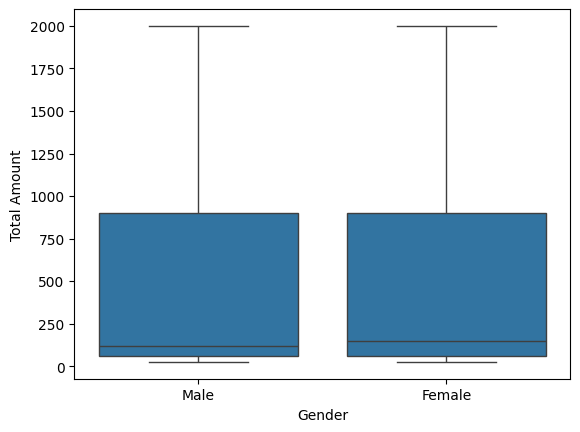

In [10]:
sns.boxplot(data=data, x='Gender', y='Total Amount')

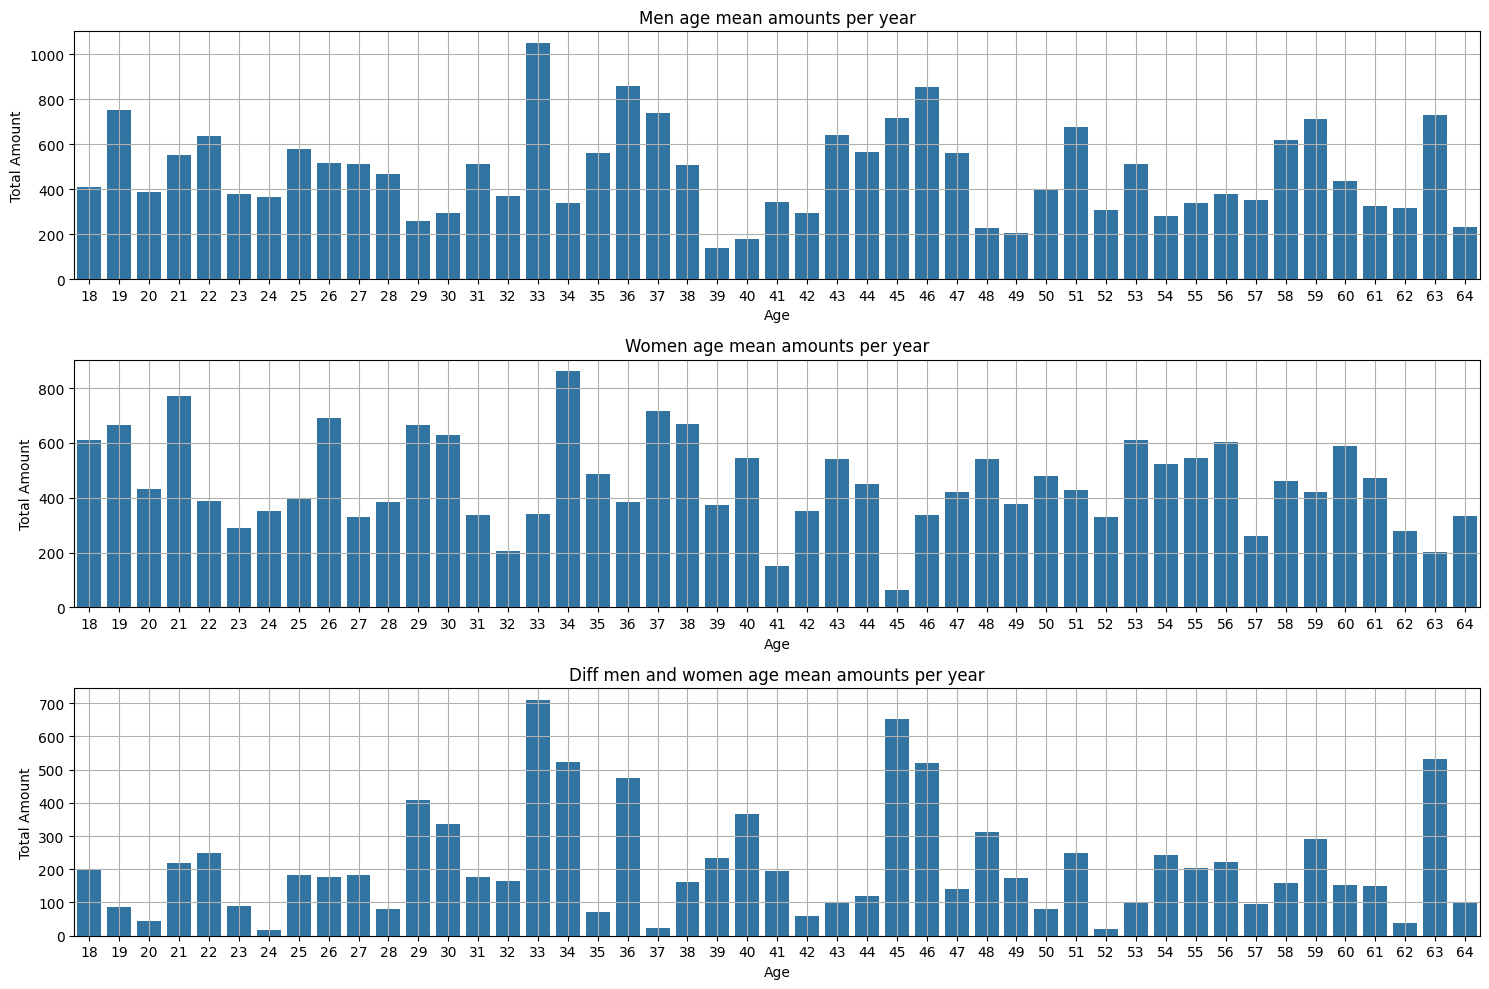

In [11]:
age_amount_per_year_men = pd.DataFrame(men_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_women = pd.DataFrame(women_df.groupby(['Age'])['Total Amount'].mean()).reset_index()
age_amount_per_year_diff = pd.DataFrame({
    'Age': age_amount_per_year_men['Age'],
    "Total Amount": abs(age_amount_per_year_men['Total Amount'] - age_amount_per_year_women['Total Amount'])
})


figure, ax = plt.subplots(3, 1, figsize=(15, 10))
sns.barplot(data = age_amount_per_year_men, x='Age', y='Total Amount', ax=ax[0])
ax[0].set_title('Men age mean amounts per year')
ax[0].grid()
sns.barplot(data = age_amount_per_year_women, x='Age', y='Total Amount', ax=ax[1])
ax[1].set_title('Women age mean amounts per year')
ax[1].grid()
sns.barplot(data = age_amount_per_year_diff, x='Age', y='Total Amount', ax=ax[2])
ax[2].set_title('Diff men and women age mean amounts per year')
ax[2].grid()
plt.tight_layout()
plt.show()

In [12]:
purchases_count_periods = data.groupby(['Date']).size().reset_index(name='PurchasesCount')
men_count_periods = men_df.groupby(['Date']).size().reset_index(name='PurchasesCount')
women_count_periods = women_df.groupby(['Date']).size().reset_index(name='PurchasesCount')
purchases_count_periods

,Date,PurchasesCount
0,2023-01-01,3
1,2023-01-02,4
2,2023-01-03,1
3,2023-01-04,3
4,2023-01-05,3
...,...,...
340,2023-12-27,2
341,2023-12-28,3
342,2023-12-29,4
343,2023-12-31,1


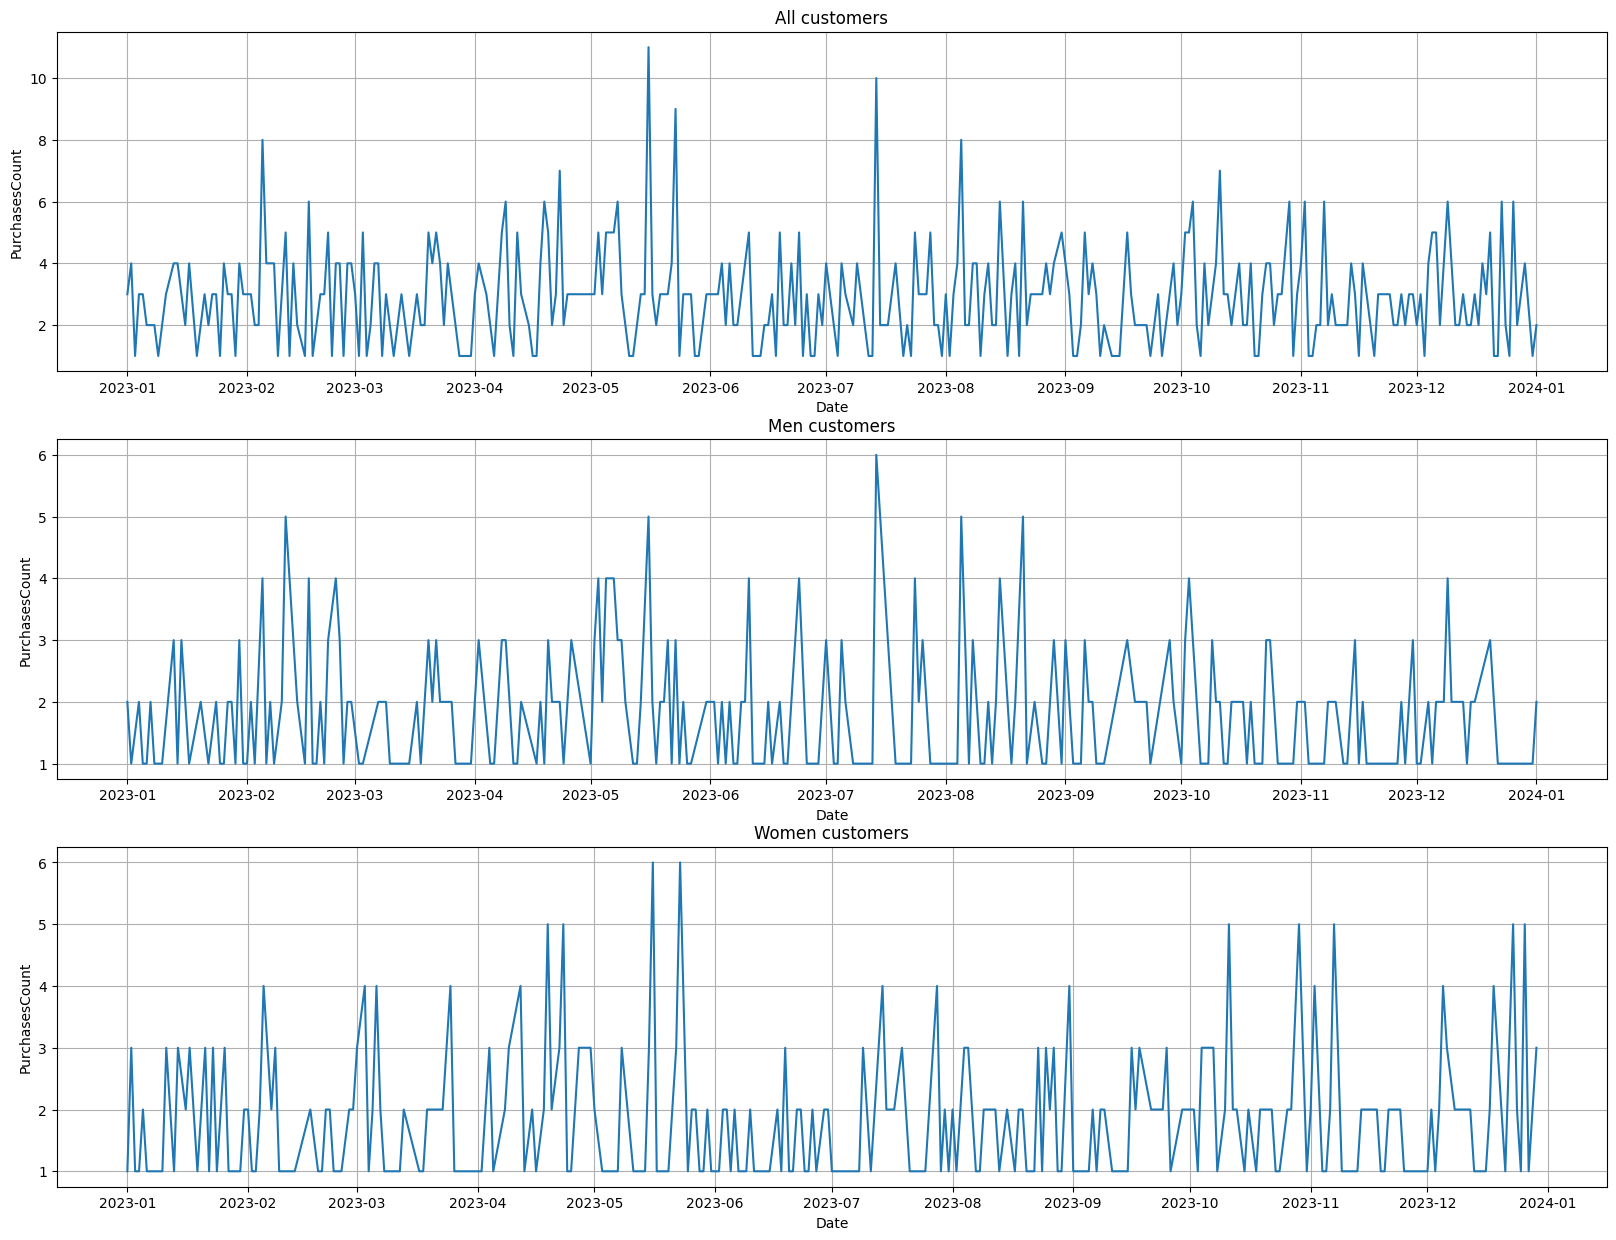

In [13]:
import matplotlib.dates as mdates

figure, ax = plt.subplots(3, 1, figsize=(20, 15))
names = ['All customers', 'Men customers', 'Women customers']
for index, d in enumerate([purchases_count_periods, men_count_periods, women_count_periods]):
    sns.lineplot(data=d, x='Date', y='PurchasesCount', ax=ax[index])
    ax[index].set_title(names[index])
    ax[index].xaxis.set_major_locator(mdates.MonthLocator())
    ax[index].grid()

In [14]:
men_group_by_count = men_count_periods['PurchasesCount'].value_counts()
women_group_by_count = women_count_periods['PurchasesCount'].value_counts()
men_group_by_count['Gender'] = 'Male'
women_group_by_count['Gender'] = 'Female'

t_df = pd.concat([men_group_by_count, women_group_by_count], axis=1, join='outer')

t_df

,count,count
PurchasesCount,,
1,131,132
2,88,88
3,35,37
4,13,11
5,4,7
6,1,2
Gender,Male,Female


Text(145.72222222222223, 0.5, 'Month')

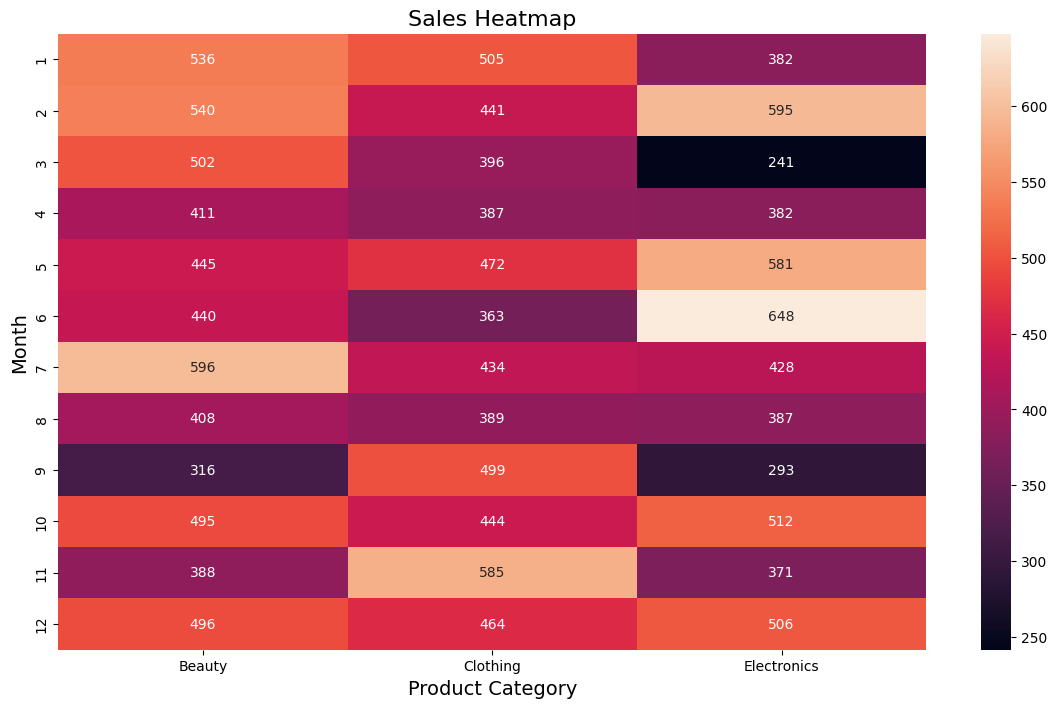

In [15]:
heatmap = data.pivot_table(index='Month', columns='Product Category', values='Total Amount')
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap, annot=True, fmt='.0f')
plt.title('Sales Heatmap', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Month', fontsize=14)

<Axes: title={'center': 'Popularity of Product Categories Based on Transactions'}, xlabel='Product Category'>

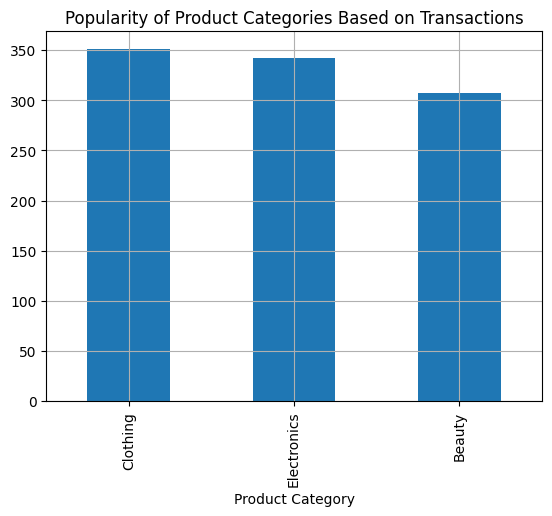

In [16]:
data["Product Category"].value_counts().plot(kind='bar', 
                                             grid=True, 
                                             title='Popularity of Product Categories Based on Transactions',)